# A3ENV007C Exercise 2 - Data Visualization and Statistical Analysis in Python

With python, we can read and visualize data in many ways. We could also analyze data and make predictions by python.

In this notebook, I will show you how to read and visualize data using the following libraries:

---
## Task 1 - Connect Google Colab to your Google Drive

Mount Google Drive into Google Colab to load files and save pictures.

Connect to Google Drive → Login → "Select what Google Drive for Desktop can access": Select All

In [ ]:
from google.colab import drive
drive.flush_and_unmount()
dir = '/content/drive/MyDrive/Colab Notebooks'
drive.mount('/content/drive')

Drive not mounted, so nothing to flush and unmount.
Mounted at /content/drive


- Go to Google Classroom and download "sample_temp_wind_speed_humidity.csv" from Week 3 Materials
- Put the csv file inside "Colab Notebooks" inside your Google Drive

---

## Task 2 - Reading Data

It is widely used in data science and machine learning projects.

Pandas is a powerful library for reading and manipulating data. It is widely used in data science and machine learning projects.

It allows us to read data from different sources, such as CSV, Excel, SQL, and many others.

We can also manipulate data using pandas, such as filtering, grouping, and sorting.

In [ ]:
import pandas as pd  # Import the Pandas library, and rename it as pd for easy reference


# Simply read the CSV file using pandas, noted that the path must be correct
url = '/content/drive/MyDrive/Colab Notebooks/sample_temp_wind_speed_humidity.csv'
df = pd.read_csv(url)

In [ ]:
# Print the first 5 rows of the data
df.head(5)

,date,month,wind_speed,temperature,humidity
0,2013-03-01,3,6.387,14.399,72.125
1,2013-03-02,3,6.649,14.549,71.617
2,2013-03-03,3,6.743,14.748,71.131
3,2013-03-04,3,6.758,14.922,70.864
4,2013-03-05,3,6.807,15.125,70.706


In [ ]:
# Print the summary statistics of the data
df.describe()

,month,wind_speed,temperature,humidity
count,1403.000000,1403.000000,1403.000000,1403.000000
mean,6.731290,6.843569,25.915780,60.375017
std,3.359966,1.829384,6.475076,12.076889
min,1.000000,2.630000,12.983000,31.499000
25%,4.000000,5.618500,20.292500,53.507500
50%,7.000000,7.217000,28.309000,61.978000
75%,10.000000,8.307000,31.168500,69.735000
max,12.000000,9.947000,34.842000,82.447000


In [ ]:
# Convert the date column to datetime format
df["date"] = pd.to_datetime(df["date"], format="%Y-%m-%d")

print(df)

           date  month  wind_speed  temperature  humidity
0    2013-03-01      3       6.387       14.399    72.125
1    2013-03-02      3       6.649       14.549    71.617
2    2013-03-03      3       6.743       14.748    71.131
3    2013-03-04      3       6.758       14.922    70.864
4    2013-03-05      3       6.807       15.125    70.706
...         ...    ...         ...          ...       ...
1398 2016-12-28     12       5.900       20.692    60.482
1399 2016-12-29     12       5.966       20.533    60.762
1400 2016-12-30     12       6.043       20.359    61.143
1401 2016-12-31     12       6.120       20.203    61.614
1402 2017-01-01      1       6.096       19.974    62.183

[1403 rows x 5 columns]


---

## Task 3 - Visualizing Data

We can easily visualize data using the matplotlib library.

It is a powerful library for scientific visualization.

In [ ]:
# Import the necessary libraries
import matplotlib.pyplot as plt

%matplotlib inline

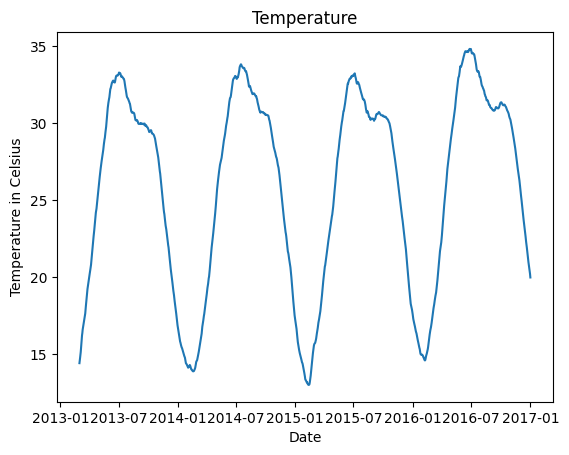

In [ ]:
# Plot the temperature data
plt.plot(df["date"], df["temperature"])
plt.title("Temperature")
plt.xlabel("Date")
plt.ylabel("Temperature in Celsius")
plt.show()

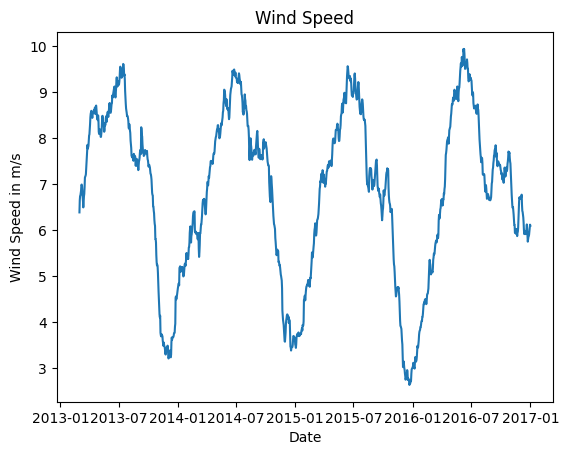

In [ ]:
# Plot the wind speed data
plt.plot(df["date"], df["wind_speed"])
plt.title("Wind Speed")
plt.xlabel("Date")
plt.ylabel("Wind Speed in m/s")
plt.show()

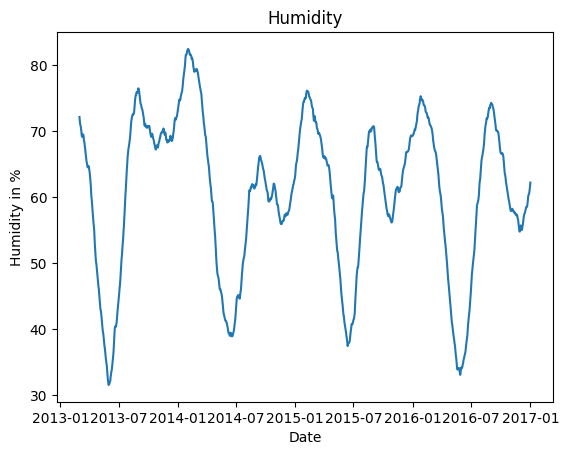

In [ ]:
# Plot the humidity data

plt.plot(df["date"], df["humidity"])
plt.title("Humidity")
plt.xlabel("Date")
plt.ylabel("Humidity in %")
plt.show()

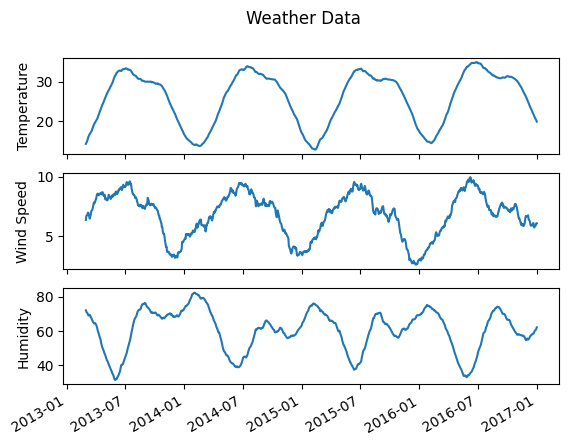

In [ ]:
# Plotting all together
fig, axs = plt.subplots(3, 1, sharex=True)

axs[0].plot(df["date"], df["temperature"])
axs[0].set_ylabel("Temperature")

axs[1].plot(df["date"], df["wind_speed"])
axs[1].set_ylabel("Wind Speed")

axs[2].plot(df["date"], df["humidity"])
axs[2].set_ylabel("Humidity")


fig.suptitle("Weather Data")
fig.autofmt_xdate()
fig.show()

---

## Task 4 - Analyzing Data

Programming allow us to analyze data and make predictions.

### Example 1. What is the mean temperature in the dataset?

In [ ]:
mean_temperature = df["temperature"].mean()


print("The mean temperature is", mean_temperature, "Celsius")

The mean temperature is 25.915780470420525 Celsius


### Example 2. What is the maximum temperature in the dataset?
- Please try to ADD SOMETHING IN THE SCRIPT to find the maximum temperature in the dataset

In [ ]:
max_temperature = ...  # Compute the maximum temperature

print("The maximum temperature is", max_temperature, "Celsius")

The maximum temperature is Ellipsis Celsius


<details>

<summary>Answer</summary>


```python
max_temperature = df['temperature']
```

</details>

### Example 3. What is the minimum temperature in the dataset?
- Please try to ADD SOMETHING IN THE SCRIPT to find the minimum temperature in the dataset

In [ ]:
min_temperature = ...  # Compute the minimum temperature

print("The minimum temperature is", min_temperature, "Celsius")

<details>

<summary>Answer</summary>


```python
min_temperature = df['temperature'].min()
```

</details>

### Example 4, what is the apparent temperature in the dataset?

The apparent temperature is the temperature that humans perceive, which is different from the actual temperature.

The relationship between the apparent temperature and the actual temperature is given by the formula:

$$ AT = 1.07  T - 0.2 e - 0.65  V - 2.7 $$

$$ e = \frac{RH}{100} \times 6.105 \times \exp(\frac{17.27 T}{237.7 + T}) $$

Where $AT$ is the apparent temperature (°C), $T$ is the actual temperature (°C), $RH$ is the relative humidity (%), and $V$ is the wind speed (m/s).

In [ ]:
import numpy as np  # Import the numpy library for mathematical operations

In [ ]:
e = (
    df["humidity"]
    / 100
    * 6.105
    * np.exp((17.27 * df["temperature"]) / (237.7 + df["temperature"]))
)

# Complete the formula for apparent temperature
df["apparent_temperature"] = ...

In [ ]:
# Plot the apparent temperature data

plt.plot(df["date"], df["apparent_temperature"], label="Apparent Temperature")
plt.plot(df["date"], df["temperature"], label="Temperature")
plt.title("Apparent Temperature")
plt.xlabel("Date")
plt.ylabel("Temperature in Celsius")
plt.legend()
plt.show()

<details>

<summary>Answer</summary>


```python
df["apparent_temperature"]  = 1.07 * df["temperature"] + 0.2 * e - 0.65 * df["wind_speed"] - 2.7
```

</details>

---

## Task 5 - Linear Regression

Linear regression is a linear approach to modeling the relationship between a dependent variable and one or more independent variables.


Scipy is a powerful library for scientific computing, under the scipy.stats module, we can find the linregress function, which allows us to perform linear regression.

In [ ]:
# Display the similarity between the temperature and apparent temperature data

plt.scatter(df["temperature"], df["apparent_temperature"], marker="x")
plt.title("Apparent Temperature vs Temperature in Celsius")
plt.xlabel("Temperature")
plt.ylabel("Apparent Temperature")
plt.show()

The relationship between the apparent temperature and the actual temperature is linear!

We can use linear regression to predict the apparent temperature based on the actual temperature.

In [ ]:
import scipy.stats as stats  # Import the scipy.stats library for statistical tests

In [ ]:
# SciPy's linregress function computes the linear regression
slope, intercept, rvalue, pvalue, _ = stats.linregress(
    df["temperature"], df["apparent_temperature"]
)

In [ ]:
# Display the data with the regression line
plt.scatter(df["temperature"], df["apparent_temperature"], marker="x")

# Plot the regression line
t = np.linspace(5, 40, 100)
plt.plot(
    t, slope * t + intercept, color="red", label=f"AT = {slope:.2f} T + {intercept:.2f}"
)

plt.title("Temperature vs Apparent Temperature")
plt.legend()
plt.xlabel("Temperature")
plt.ylabel("Apparent Temperature")
plt.show()

### Significance of the regression coefficient

The regression coefficient (slope) is a measure of the strength and direction of the relationship between the independent variable and the dependent variable. The significance of the regression coefficient is given by the p-value.


### p-value

The p-value is a measure of the probability that the relationship between the independent variable and the dependent variable is due to random chance. If the p-value is less than 0.05, we can conclude that the relationship between the independent variable and the dependent variable is significant.



In [ ]:
print(f"The p-value is {pvalue:.4f}.")

### R-squared

The R-squared is a measure of the goodness of fit of the regression model. The R-squared is a value between 0 and 1, where 0 means that the model does not explain the variance in the dependent variable, and 1 means that the model explains all the variance in the dependent variable. The R-squared is significant if it is greater than 0.5.

In [ ]:
print(f"The R-squared value is {rvalue**2:.4f}.")

### Try it Yourself!


Perform a linear regression between the humidity and the apparent temperature.

In [ ]:
# Complete me!

<details>
    <summary>Answer</summary>

```python
# Display the similarity between the temperature and apparent temperature data

plt.scatter(df['humidity'], df['apparent_temperature'], marker='x')
plt.title('Apparent Temperature vs Humidity')
plt.xlabel('Humidity')
plt.ylabel('Apparent Temperature')
plt.show()

# Perform a linear regression between humidity and apparent temperature

slope, intercept, rvalue, pvalue, _ = stats.linregress(df['humidity'], df['apparent_temperature'])

# Display the data with the regression line

plt.scatter(df['humidity'], df['apparent_temperature'], marker='x')

# Plot the regression line
h = np.linspace(0, 100, 100)
plt.plot(h, slope * h + intercept, color='red', label = f"AT = {slope:.2f} H + {intercept:.2f}")

plt.title('Apparent Temperature vs Humidity')
plt.legend()
plt.xlabel('Humidity')
plt.ylabel('Apparent Temperature')
plt.show()


print(f'The p-value is {pvalue:.4f}.')
print(f'The R-squared value is {rvalue**2:.4f}.')

```

</details>

---

## Task 6 - T-test

The t-test is a statistical test used to determine whether there is a significant difference between the means of two groups. The t-test also tells you how significant the differences are; In other words it lets you know if those differences could have happened by chance.


The `scipy.stats` module provides the `ttest_ind` function, which allows us to perform a t-test.

`ttest_ind` results in a t-statistic and a p-value, the t-statistic is a measure of the difference between the means of the two groups, the higher the magnitude of the t-statistic, the more significant the difference between the means of the two groups. Similar to the linear regression, the p-value is a measure of the probability that the difference between the means of the two groups is due to random chance. If the p-value is less than 0.05, we can conclude that the difference between the means of the two groups is significant.



### Example 1. How different is the apparent temperature between the months of January and Jun?

In [ ]:
jan_data = df[df["month"] == 1]
jun_data = df[df["month"] == 6]

# Plot the temperature data for January and Jun
plt.hist(jan_data["apparent_temperature"], bins=20, label="January", histtype="step")
plt.hist(jun_data["apparent_temperature"], bins=20, label="June", histtype="step")
plt.title("Temperature Distribution")
plt.xlabel("Temperature")
plt.ylabel("Frequency")
plt.legend()
plt.show()

In [ ]:
# T-test for the apparent temperature in January and June

t_stat, p_val = stats.ttest_ind(
    jun_data["apparent_temperature"], jan_data["apparent_temperature"]
)

In [ ]:
print(f"The p-value is {p_val:.4f}.")

In [ ]:
print(f"The t-statistic is {t_stat:.4f}.")

### The magnitude of the p-value is
- ### high | small,
### and the t-statistic is
- ### high | small,
### therefore the difference between the means of the two groups is
- ### significant | not significant.

### Example 2. How different is the apparent temperature between the months of February and December?

In [ ]:
# Complete me!

<details>
  <summary>Answer</summary>
  
  
```python
feb_data = df[df["month"] == 2]
dec_data = df[df["month"] == 12]

# Plot the temperature data
plt.hist(feb_data["apparent_temperature"], bins=20, label="February", histtype="step")
plt.hist(dec_data["apparent_temperature"], bins=20, label="December", histtype="step")
plt.title("Temperature Distribution")
plt.xlabel("Temperature")
plt.ylabel("Frequency")
plt.legend()
plt.show()

t_stat, p_val = stats.ttest_ind(feb_data["apparent_temperature"], dec_data["apparent_temperature"])

print(f'The p-value is {p_val:.4f}.')
print(f'The t-statistic is {t_stat:.4f}.')

```

</details>
